## N is a number of unit cells here!

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg

In [2]:
def SSH_hamiltonian_periodic(N1, Delta):
    N = N1*2
    x = np.zeros(N-1)
    x[0::2] = 1 - Delta
    x[1::2] = 1 + Delta
    A = np.diag(x, k = 1) + np.diag(x, k = -1)
    A[0][N-1] = 1 + Delta
    A[N-1][0] = 1 + Delta
    return A

In [3]:
def corr_matrix(N1, Delta):
    eps = 1e-15
    eigenvalues, eigenvectors = np.linalg.eigh(SSH_hamiltonian_periodic(N1, Delta))
    idx = eigenvalues.argsort()[::1]   
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:,idx]
    N = N1*2
    Corr_matrix = np.zeros((N,N), dtype = "complex")    
    for i in range(N):
        for j in range(N):
            for k in range(N//2):
                Corr_matrix[i][j] += np.conjugate(eigenvectors[:,k][i])*(eigenvectors[:,k][j])
    return Corr_matrix  

In [4]:
def corr_matrix_A(N1, Delta):
    return corr_matrix(N1, Delta)[0:N1, 0:N1]

In [5]:
def entang_entropy_A(N, Delta):
    CM = corr_matrix_A(N, Delta)
    S = 0.0
    lambd = np.linalg.eigvalsh(CM)
    for i in range(np.shape(CM)[0]):
        if lambd[i] > 1e-14 and (1 - lambd[i]) > 1e-14:     
            S -= lambd[i]*np.log(lambd[i]) + (1 - lambd[i])*np.log(1 - lambd[i])
        else:
            S -= 0
    return(S)

In [6]:
def entang_entropy_A1(N, Delta):
    CM = corr_matrix_A(N, Delta)
    S = 0.0
    lambd = np.linalg.eigvalsh(CM)
    for i in range(np.shape(CM)[0]):  
        S -= lambd[i]*np.log(lambd[i]) + (1 - lambd[i])*np.log(1 - lambd[i])
    return(S)

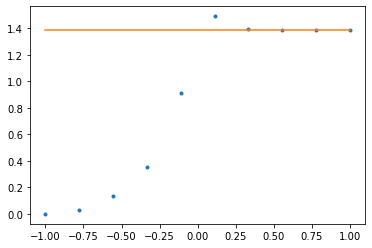

In [7]:
M = 10
N = 50
Delta = np.linspace(-1,1,M)
Entropy_array = np.array([entang_entropy_A(N, Delta[i]) for i in range(M)])
plt.plot(Delta, Entropy_array, ".")
plt.plot(Delta, np.ones(Delta.size)*2*np.log(2))

# FOURIER Transform

In [8]:
def u_func(k, Delta, N):
    lambda1 = (1 - Delta) + (1 + Delta)*np.exp(-(2*np.pi/N)*1j*k)
    s = np.sqrt(lambda1 / np.conjugate(lambda1))
    u1 = -(1/np.sqrt(2))*np.array([-1, s]) 
    u2 = -(1/np.sqrt(2))*np.array([1, s])
    return u1, u2 

Почему u_func не работает? Надо пересчитать! Что там с блоховскими состояниями?

In [9]:
def u_func_new(k, Delta, N):
    H = np.array([[0, (1 - Delta) + (1 + Delta)*np.exp(-(2*np.pi/N)*1j*k)],[(1 - Delta) + (1 + Delta)*np.exp((2*np.pi/N)*1j*k), 0]])
    eigenvalues, eigenvectors = np.linalg.eigh(H)
    idx = eigenvalues.argsort()[::1]   
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:,idx]
    return eigenvectors

In [10]:
N = 6
for k in range(N):
    print(u_func_new(k, 1, N)[:,0])

[-0.70710678+0.j  0.70710678+0.j]
[-0.70710678-0.j          0.35355339+0.61237244j]
[-0.70710678+0.j         -0.35355339+0.61237244j]
[-0.70710678+0.00000000e+00j -0.70710678+8.65956056e-17j]
[-0.70710678+0.j         -0.35355339-0.61237244j]
[-0.70710678-0.j          0.35355339-0.61237244j]


In [11]:
for k in range(6):
    print(np.exp(1j*2*np.pi*k/N)/np.sqrt(2))

(0.7071067811865475+0j)
(0.3535533905932738+0.6123724356957945j)
(-0.35355339059327356+0.6123724356957945j)
(-0.7071067811865475+8.659560562354932e-17j)
(-0.35355339059327406-0.6123724356957944j)
(0.3535533905932738-0.6123724356957945j)


In [12]:
def corr_matrix_new(N1, Delta):
    N = N1*2
    eps = 1e-15
    C = np.zeros((N,N),dtype = "complex")
    for i in range(N):
        for j in range(N):
            for k in range(N//2):
                    C[i][j] += (1/N1)*np.conjugate(u_func_new(k, Delta, N1)[:,0][i%2])*np.exp(-(2*np.pi/N1)*1j*k*(i//2 - j//2))*u_func_new(k, Delta, N1)[:,0][j%2]
    return C

In [13]:
def corr_matrix_A_new(N, Delta):
    return corr_matrix_new(N, Delta)[0:N, 0:N]

In [14]:
def entang_entropy_A_new(N, Delta):
    CM = corr_matrix_A_new(N, Delta)
    S = 0.0
    lambd = np.linalg.eigvalsh(CM)
    for i in range(np.shape(CM)[0]):
        if lambd[i] > 1e-14 and (1 - lambd[i]) > 1e-14:     
            S -= lambd[i]*np.log(lambd[i]) + (1 - lambd[i])*np.log(1 - lambd[i])
        else:
            S -= 0
    return(S)

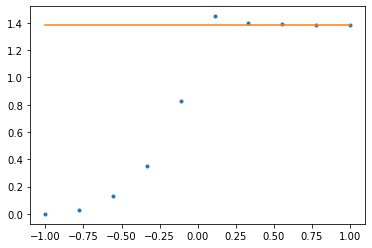

In [15]:
M = 10
N = 10
Delta = np.linspace(-1,1,M)
Entropy_array_new = np.array([entang_entropy_A_new(N, Delta[i]) for i in range(M)])
plt.plot(Delta, Entropy_array_new, ".")
plt.plot(Delta, np.ones(Delta.size)*2*np.log(2))

In [16]:
#testing for imaginary eigenvalues of the correlation matrix A
N = 20
smth = 100
S_array = np.array([corr_matrix_A(N, i) for i in np.linspace(-1,1,smth)])
for i in range(smth):
    print(np.linalg.eigvalsh(S_array[i]))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[-2.36698330e-16 -1.19420337e-16 -2.38078226e-17  9.53291711e-17
  1.19738753e-16  2.08050141e-16  2.13417365e-16  3.01883154e-16
  6.50800159e-06  6.50800159e-06  9.99993492e-01  9.99993492e-01
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00]
[-2.45634101e-16 -1.92885765e-16 -8.13228512e-17 -7.17374848e-18
  4.13827500e-17  1.34933629e-16  1.84305442e-14  1.85044861e-14
  2.65752482e-05  2.65752482e-05  9.99973425e-01  9.99973425e-01
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00]
[-4.34107599e-16 -2.87462608e-16 -2.44051676e-16 -8.19234775e-17
  5.74870146e-17  2.14761137e-16  2.27484264e-13  2.27607429e-13
  6.10612490e-05  6.10612490e-05  9.99938939e-01  9.99938939e-01
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.000000

In [17]:
#symmetry of the correlation matrix A

Num = 50
Delta = 0.9
S = corr_matrix_A(Num, Delta)
S_eigvals = np.linalg.eigvalsh(S)
S_new = []
for i in range(Num//2):
    S_new.append(S_eigvals[i] + S_eigvals[-i-1])
S_new = np.array(S_new)
print("S old = ", S_eigvals)
print("S new = ", S_new)

S old =  [-5.23391544e-16 -4.97914811e-16 -3.70224246e-16 -3.51218758e-16
 -3.01493660e-16 -2.38743418e-16 -1.97888462e-16 -1.53922413e-16
 -1.03857259e-16 -9.75506218e-17 -6.43654685e-17 -1.74359356e-18
  2.53029130e-17  6.79349035e-17  1.06274189e-16  1.19095519e-16
  1.79403206e-16  2.83508849e-16  2.92488284e-16  3.45218662e-16
  6.93887087e-16  8.16081279e-16  3.00573026e-08  3.00573028e-08
  5.00000000e-01  5.00000000e-01  9.99999970e-01  9.99999970e-01
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00]
S new =  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1.]


In [18]:
def Z_n(n, alpha, Delta, N1):
    #alpha goes from 0 to 2 pi
    C = corr_matrix_A(N1, Delta)
    eigenvalues, eigenvectors = np.linalg.eigh(C)
    idx = eigenvalues.argsort()[::1]   
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:,idx]
    Z = 1.0
    for m in range(N1):
        lam = eigenvalues[m]
        Z *= ((lam**n)*np.exp(1j*alpha*(1 - lam)) + ((1 - lam)**n)*np.exp(-1j*alpha*lam))
    return Z


#real Z_N expression

In [19]:
'''N = 10
alpha_test = np.array([2*np.pi*j/N for j in range(N)])
Delta = 1
typ = 1
Z_n_test = np.array(Z_n(typ, alpha_test[i], Delta, N) for i in range(N))
plt.plot(alpha_test, Z_n_test)'''

'N = 10\nalpha_test = np.array([2*np.pi*j/N for j in range(N)])\nDelta = 1\ntyp = 1\nZ_n_test = np.array(Z_n(typ, alpha_test[i], Delta, N) for i in range(N))\nplt.plot(alpha_test, Z_n_test)'

In [20]:
def log_Z_N(n, alpha, Delta, N1):
    #alpha goes from 0 to 2 pi
    C = corr_matrix_A(N1, Delta)
    eigenvalues, eigenvectors = np.linalg.eigh(C)
    idx = eigenvalues.argsort()[::1]   
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:,idx]
    Z = 1.0
    for m in range(N1):
        lam = eigenvalues[m]
        Z += np.log(((lam**n)*np.exp(1j*alpha*(1 - lam)) + ((1 - lam)**n)*np.exp(-1j*alpha*lam)))
    return Z

In [21]:
N = 20
type_num = 1
Delta1 = -1
Delta2 = 1
Delta3 = -0.5
Delta4 = 0.5
Delta5 = -0.2
Delta6 = 0.2
Delta7 = -0.1
Delta8 = 0.1
Delta9 = -0.01
Delta10 = 0.01
alpha_array = np.linspace(-np.pi, np.pi, N)

In [22]:
Z_n_array1 = np.array([Z_n(type_num, alpha_array[i], Delta1, N) for i in range(N)])
Z_n_array2 = np.array([Z_n(type_num, alpha_array[i], Delta2, N) for i in range(N)])
Z_n_array3 = np.array([Z_n(type_num, alpha_array[i], Delta3, N) for i in range(N)])
Z_n_array4 = np.array([Z_n(type_num, alpha_array[i], Delta4, N) for i in range(N)])
Z_n_array5 = np.array([Z_n(type_num, alpha_array[i], Delta5, N) for i in range(N)])
Z_n_array6 = np.array([Z_n(type_num, alpha_array[i], Delta6, N) for i in range(N)])
Z_n_array7 = np.array([Z_n(type_num, alpha_array[i], Delta7, N) for i in range(N)])
Z_n_array8 = np.array([Z_n(type_num, alpha_array[i], Delta8, N) for i in range(N)])
Z_n_array9 = np.array([Z_n(type_num, alpha_array[i], Delta9, N) for i in range(N)])
Z_n_array10 = np.array([Z_n(type_num, alpha_array[i], Delta10, N) for i in range(N)])

C:\Users\MI\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, '$\\delta$ = 1, N =20')

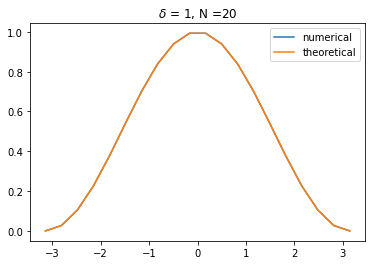

In [23]:
# For delta = 1

plt.plot(alpha_array, Z_n_array2, label = "numerical") #numerical result 
plt.plot(alpha_array, np.cos(alpha_array/2)**2, label = "theoretical") #theoretical result
plt.legend()
plt.title("$\delta$ = 1, N =" + str(N))

C:\Users\MI\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\MI\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\MI\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\MI\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, '$Z_1$, N = 20')

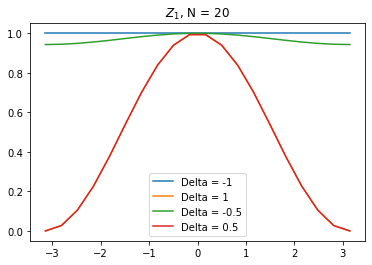

In [24]:
plt.plot(alpha_array, Z_n_array1, label = "Delta = " + str(Delta1))
plt.plot(alpha_array, Z_n_array2, label = "Delta = " + str(Delta2))
plt.plot(alpha_array, Z_n_array3, label = "Delta = " + str(Delta3))
plt.plot(alpha_array, Z_n_array4, label = "Delta = " + str(Delta4))
plt.legend()
plt.title("$Z_1$, N = " + str(N))

C:\Users\MI\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\MI\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\MI\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\MI\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\MI\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\MI\Anaconda3\lib\site-packages\

Text(0.5, 1.0, '$Z_1$, N = 20')

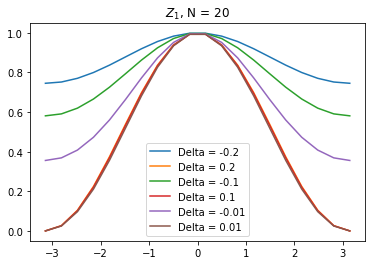

In [25]:
plt.plot(alpha_array, Z_n_array5, label = "Delta = " + str(Delta5))
plt.plot(alpha_array, Z_n_array6, label = "Delta = " + str(Delta6))
plt.plot(alpha_array, Z_n_array7, label = "Delta = " + str(Delta7))
plt.plot(alpha_array, Z_n_array8, label = "Delta = " + str(Delta8))
plt.plot(alpha_array, Z_n_array9, label = "Delta = " + str(Delta9))
plt.plot(alpha_array, Z_n_array10, label = "Delta = " + str(Delta10))
plt.legend()
plt.title("$Z_1$, N = " + str(N))

In [26]:
N1 = 20
typ = 2
alpha_array_1 = np.array([2*np.pi*j/N for j in range(N1)])

log_Z_n_array1 = np.array([log_Z_N(typ, alpha_array_1[i], Delta1, N1) for i in range(N1)])
log_Z_n_array2 = np.array([log_Z_N(typ, alpha_array_1[i], Delta2, N1) for i in range(N1)])
log_Z_n_array3 = np.array([log_Z_N(typ, alpha_array_1[i], Delta3, N1) for i in range(N1)])
log_Z_n_array4 = np.array([log_Z_N(typ, alpha_array_1[i], Delta4, N1) for i in range(N1)])
log_Z_n_array5 = np.array([log_Z_N(typ, alpha_array_1[i], Delta5, N1) for i in range(N1)])
log_Z_n_array6 = np.array([log_Z_N(typ, alpha_array_1[i], Delta6, N1) for i in range(N1)])
log_Z_n_array7 = np.array([log_Z_N(typ, alpha_array_1[i], Delta7, N1) for i in range(N1)])
log_Z_n_array8 = np.array([log_Z_N(typ, alpha_array_1[i], Delta8, N1) for i in range(N1)])
log_Z_n_array9 = np.array([log_Z_N(typ, alpha_array_1[i], Delta9, N1) for i in range(N1)])
log_Z_n_array10 = np.array([log_Z_N(typ, alpha_array_1[i], Delta10, N1) for i in range(N1)])

C:\Users\MI\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\MI\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\MI\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\MI\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, '$log{Z_2}$, N = 20')

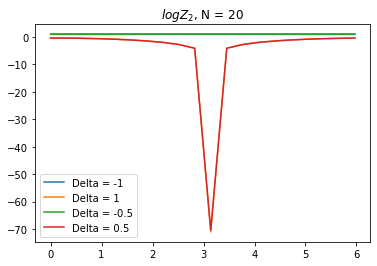

In [27]:
plt.plot(alpha_array_1, log_Z_n_array1, label = "Delta = " + str(Delta1))
plt.plot(alpha_array_1, log_Z_n_array2, label = "Delta = " + str(Delta2))
plt.plot(alpha_array_1, log_Z_n_array3, label = "Delta = " + str(Delta3))
plt.plot(alpha_array_1, log_Z_n_array4, label = "Delta = " + str(Delta4))
plt.legend()
plt.title("$log{Z_2}$, N = " + str(N1))

C:\Users\MI\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\MI\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\MI\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\MI\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\MI\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\MI\Anaconda3\lib\site-packages\

Text(0.5, 1.0, '$log{Z_2}$, N = 20')

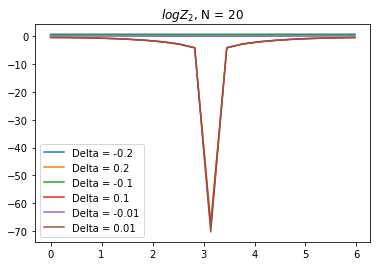

In [28]:
plt.plot(alpha_array_1, log_Z_n_array5, label = "Delta = " + str(Delta5))
plt.plot(alpha_array_1, log_Z_n_array6, label = "Delta = " + str(Delta6))
plt.plot(alpha_array_1, log_Z_n_array7, label = "Delta = " + str(Delta7))
plt.plot(alpha_array_1, log_Z_n_array8, label = "Delta = " + str(Delta8))
plt.plot(alpha_array_1, log_Z_n_array9, label = "Delta = " + str(Delta9))
plt.plot(alpha_array_1, log_Z_n_array10, label = "Delta = " + str(Delta10))
plt.legend()
plt.title("$log{Z_2}$, N = " + str(N1))